# Denmark's trading balance from 2009-2019 (NAN1 in DST)

# Introduction

This analysis focuses on Denmark's trade dynamics and economic performance using data from Danmarks Statistik through the DST API wrapper package. By examining import, export, net export, and GDP trends over a specific time period, we aim to gain insights into Denmark's trade balance and economic strength. Through this analysis, we aim to understand the country's position in the global market and draw conclusions about its economic outlook.

# 1. Importing data

In [4]:
#Installing the DST API wrapper package
'%pip install git+https://github.com/alemartinello/dstapi'

#Installing the wrapper for multiple APIs with a pandas interface
'%pip install pandas-datareader'

'%pip install pandas-datareader'

In [5]:
#Importing and setting magic
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [6]:
#Importing data from Danmarks Statistik using dstapi
ind = DstApi('NAN1')

In [7]:
#Overview of the data from NAN1 (DST)
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2023-03-31T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LAN_C,"Pr. capita, 2010-prices, chained values, (1000...",False
2,Tid,57,1966,1966,2022,2022,True


In [8]:
# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2010-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


In [9]:
#Creating a template for the parameters using The _define_base_params -method (giving access to all data)
params = ind._define_base_params(language='en')
params

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [10]:
#Define params specifically
variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['P71K', 'P72K', 'P61D', 'P62D'] # Import and export of respectively goods and services
variables[1]['values'] = ['V_M'] # Current prices (Løbende priser)
variables[2]['values'] = ['>2008<=2019'] # From 2009 to 2019
params

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT',
   'values': ['P71K', 'P72K', 'P61D', 'P62D']},
  {'code': 'PRISENHED', 'values': ['V_M']},
  {'code': 'Tid', 'values': ['>2008<=2019']}]}

In [11]:
#Loading/presenting the current data set
inc_api = ind.get_data(params=params)
print(inc_api)

                   TRANSAKT                     PRISENHED   TID INDHOLD
0      P.61 Export of goods  Current prices, (bill. DKK.)  2013   656.4
1   P.62 Export of services  Current prices, (bill. DKK.)  2013   401.6
2      P.71 Import of goods  Current prices, (bill. DKK.)  2013   585.3
3   P.72 Import of services  Current prices, (bill. DKK.)  2013   345.2
4      P.61 Export of goods  Current prices, (bill. DKK.)  2010   568.3
5   P.62 Export of services  Current prices, (bill. DKK.)  2010   346.6
6      P.71 Import of goods  Current prices, (bill. DKK.)  2010   491.7
7   P.72 Import of services  Current prices, (bill. DKK.)  2010   297.4
8      P.61 Export of goods  Current prices, (bill. DKK.)  2019   799.1
9   P.62 Export of services  Current prices, (bill. DKK.)  2019   556.3
10     P.71 Import of goods  Current prices, (bill. DKK.)  2019   700.7
11  P.72 Import of services  Current prices, (bill. DKK.)  2019   491.2
12     P.61 Export of goods  Current prices, (bill. DKK.)  2014 

# 2. Visualiazing data

In the following section, we would like to present the sum of respectively export and import for each year in a bar plot. To get further insight, we would like to add another feature in terms of the net export to see how the Danish trading balance changes every year from 2009 to 2019.

/var/folders/qv/tz1h_hsd5fb2k7dm0jrqym9r0000gn/T/ipykernel_27897/1613425505.py:63: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, axis='y', linewidth=0.05, linestyle='-', color='gray')


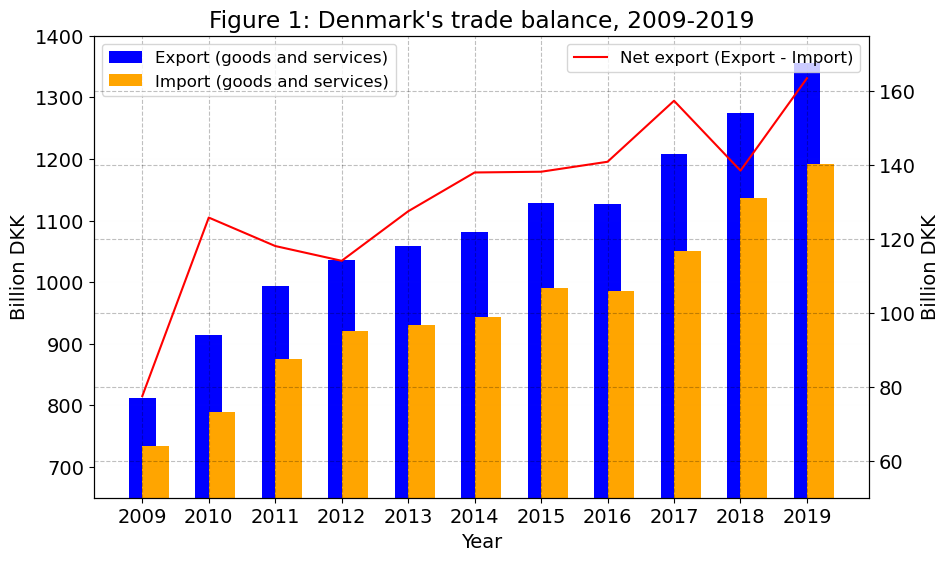

In [12]:
#Creating a template for the parameters using The _define_base_params -method (giving access to all data)
params = ind._define_base_params(language='en')

#Define data set to specific variables
variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['P71K', 'P72K', 'P61D', 'P62D'] # Import and export of respectively goods and services
variables[1]['values'] = ['V_M'] # Current prices (Løbende priser)
variables[2]['values'] = ['>2008<=2019'] # From 2009 to 2019

#Loading/presenting the current data set
inc_api = ind.get_data(params=params)

# Pivot the data to create separate columns for import and export
df_pivoted = inc_api.pivot_table(index='TID', columns='TRANSAKT', values='INDHOLD')

# Combine export of goods and services into one column
df_pivoted['Export'] = df_pivoted['P.61 Export of goods'] + df_pivoted['P.62 Export of services']

# Combine import of goods and services into one column
df_pivoted['Import'] = df_pivoted['P.71 Import of goods'] + df_pivoted['P.72 Import of services']

# Drop the original columns for import and export
df_pivoted = df_pivoted.drop(columns=['P.61 Export of goods', 'P.62 Export of services', 'P.71 Import of goods', 'P.72 Import of services'])

# Calculate the ratio of export to import for each year
df_pivoted['Ratio'] = df_pivoted['Export'] - df_pivoted['Import']

# Plot the data as bar charts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot import and export as bars on the first axis
ax1.bar(df_pivoted.index, df_pivoted['Export'], width=0.4, align='center', color='blue', label='Export (goods and services)')
ax1.bar(df_pivoted.index, df_pivoted['Import'], width=0.4, align='edge', color='orange', label='Import (goods and services)')

# Set the x-axis label and ticks
ax1.set_xlabel('Year')
ax1.set_xticks(df_pivoted.index)

# Set the y-axis label and limits for the first axis
ax1.set_ylabel('Billion DKK')
ax1.set_ylim([650, 1400])

# Set the title
ax1.set_title('Figure 1: Denmark\'s trade balance, 2009-2019')

# Set the legend for the first axis
ax1.legend(loc='upper left', fontsize=12)

# Create a second axis for the ratio plot
ax2 = ax1.twinx()

# Plot the ratio as a line on the second axis
ax2.plot(df_pivoted.index, df_pivoted['Ratio'], color='red', label='Net export (Export - Import)')

# Set the y-axis label and limits for the second axis
ax2.set_ylabel('Billion DKK')
ax2.set_ylim([50, 175])

# Set the legend for the second axis
ax2.legend(loc='upper right', fontsize=12)

# Remove the grid lines for both axes
ax1.grid(b=True, axis='y', linewidth=0.05, linestyle='-', color='gray')

# Set the same y-axis limits for both axes
ax1.set_ylim([650, 1400])
ax2.set_ylim([50, 175])

# Show the plot
plt.show()

As demonstrated in Figure 1, it is evident that Denmark's total exports surpass its imports, resulting in a consistent trade surplus as per the data from Danmarks Statistik's NAN1 table. This is a favorable economic position for Denmark, indicating a positive net exchange with foreign nations, which is a favorable economic position. Notably, the net export not only remained positive throughout 2009-2019 but also showed an upward trend. A staggering more than doubling of the net export was observed during this decade.
The reader of the analysis must have in mind that inflation is a part of these trading figures as the price unit is current prices (løbende priser). To provide a more comprehensive and specific analysis, the statement suggests considering the impact of inflation on these trading figures. It recommends conducting a similar analysis using "locked" prices, such as 2010 prices, to account for inflation and make a more conclusive assessment. 

Overall, the statement emphasizes Denmark's consistent trade surplus and encourages a more detailed analysis considering inflation for a more accurate evaluation.

# 3. Descriptive economics analysis of the data

In [13]:
#Printing net export to get data
print(df_pivoted['Ratio'])


TID
2009     77.5
2010    125.8
2011    118.1
2012    114.1
2013    127.5
2014    138.0
2015    138.2
2016    140.9
2017    157.4
2018    138.5
2019    163.5
Name: Ratio, dtype: float64


Denmark's net exports show a generally increasing trend from 2009 to 2019, indicative of a strengthening trade balance during this period. Notably, the largest annual surge happened between 2009 and 2010, with net exports leaping from 77.5 to 125.8. This significant increase could be attributed to the global financial crisis of 2007-2008, which caused a sharp decline in economic activity in Denmark. However, by 2010, the economy began to recover, leading to the surge in net exports.
The highest value for net exports during the mentioned period was recorded in 2019, amounting to 163.5. This suggests that Denmark's trade balance continued to improve and strengthen throughout the given timeframe.

In [14]:
data = {
    "Year": [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    "Gross National Product, GDP (Løbende priser, mia. kr.)": [1722, 1811, 1847, 1895, 1930, 1981, 2036, 2108, 2193, 2253, 2311],
    "Imports (Share of goods and services)": [43, 44, 47, 49, 48, 48, 49, 47, 48, 50, 52],
    "Exports (Share of goods and services)": [47, 51, 54, 55, 55, 55, 55, 53, 55, 57, 59]
}

# Print the data
print("Year\t\tGDP (Løbende priser, mia. kr.)\tImports (Share of goods and services)\tExports (Share of goods and services)")
for i in range(len(data["Year"])):
    year = data["Year"][i]
    gdp_value = data["Gross National Product, GDP (Løbende priser, mia. kr.)"][i]
    imports_value = data["Imports (Share of goods and services)"][i]
    exports_value = data["Exports (Share of goods and services)"][i]
    print(f"{year}\t\t{gdp_value}\t\t\t\t\t\t\t{imports_value}%\t\t\t\t\t\t{exports_value}%")

Year		GDP (Løbende priser, mia. kr.)	Imports (Share of goods and services)	Exports (Share of goods and services)
2009		1722							43%						47%
2010		1811							44%						51%
2011		1847							47%						54%
2012		1895							49%						55%
2013		1930							48%						55%
2014		1981							48%						55%
2015		2036							49%						55%
2016		2108							47%						53%
2017		2193							48%						55%
2018		2253							50%						57%
2019		2311							52%						59%


In both 2009 and 2010, the shares of import and export were at their lowest compared to the remaining years. However, it is worth noting that these shares experienced a significant increase during this period.
Similarly, there was an upward trend in the shares observed in 2011, marking the beginning of a stable period that continued until 2017. Throughout this period, the shares closely aligned with their respective averages for the entire time frame.
Subsequently, both import and export shares experienced notable growth in 2018, with an even more pronounced increase in 2019, reaching the highest point for the entire duration of the analyzed period.

As mentioned in the previous point, it is worth noting the remarkable deviation in the shares of import and export in 2009, standing at 43% and 47% respectively. These percentages are significantly lower compared to the average for both shares over the entire time period. A similar, albeit less pronounced, trend can be observed in 2010.
In 2016, the shares experience a decline compared to the other years within the same stable period, distinguishing it from the rest of the period. Additionally, it is noteworthy that 2019 records the highest share in both export and import, exceeding the average for the entire time period.

Method:
The shares of import and export provide valuable insights into the size proportions relative to GDP. However, it is important to acknowledge the methodological limitations associated with using shares. The shares do not capture either the relative or absolute growth. Furthermore, they solely depict the interrelation between sizes, making it inappropriate to draw conclusions about the actual size itself.

For instance, if we examine the year 2016, we observe a decline in both shares. However, upon reviewing Annex 1, we discover that both export and import (in current prices) experience only a slight decrease compared to 2015. Moreover, it is noteworthy that GDP shows a drastic growth in 2016. Therefore, the decline in shares during 2016 can be attributed to the interrelation between sizes, even though the actual size of import and export hardly decreases.

# Conclusion

The DST API wrapper package is a useful tool to import data from Danmarks Statistik to create analysis and more in Python. In this assignment, we have imported the NAN1-table which describes the Danish demand and supply in financial terms (called "Forsyningsbalance" in Danish). Due to massive amount of data within NAN1, we chose to look into import and export specifically. Our analysis involved aggregating both goods and services for import and export variables and calculating their respective shares. From this data, we also derived the net export. Additionally, we observed the trends in Gross Domestic Product (GDP) over the selected time period. The time period for analysis was 2009-2019. Throughout this period, we consistently observed that the export exceeded the import every year, indicating a trade surplus. Moreover, there is a notable increasing trend in the net export over time. Overall, our findings demonstrate the robustness of the DST API wrapper package in enabling data importation and analysis, highlighting the positive trade balance of Denmark with a growing net export over the examined time frame.